# Uma gramáticas para gráficos

In [1]:
library(mdsr)
library(ggplot2)
library(dplyr)
options(repr.plot.width = 10, repr.plot.height = 6)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Estética (_Aesthetics_)

In [2]:
data(CIACountries)
head(CIACountries)

,country,pop,area,oil_prod,gdp,educ,roadways,net_users
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Afghanistan,32564342,652230,0,1900,NA,0.06462444,>5%
2,Albania,3029278,28748,20510,11900,3.3,0.62613051,>35%
3,Algeria,39542166,2381741,1420000,14500,4.3,0.04771929,>15%
4,American Samoa,54343,199,0,13000,NA,1.21105528,NA
5,Andorra,85580,468,NA,37200,NA,0.68376068,>60%
6,Angola,19625353,1246700,1742000,7300,3.5,0.04125211,>15%


1. Gráfico de sispersão usando apenas a posição estética para os glifos

Warning message:
“Removed 64 rows containing missing values (geom_point).”


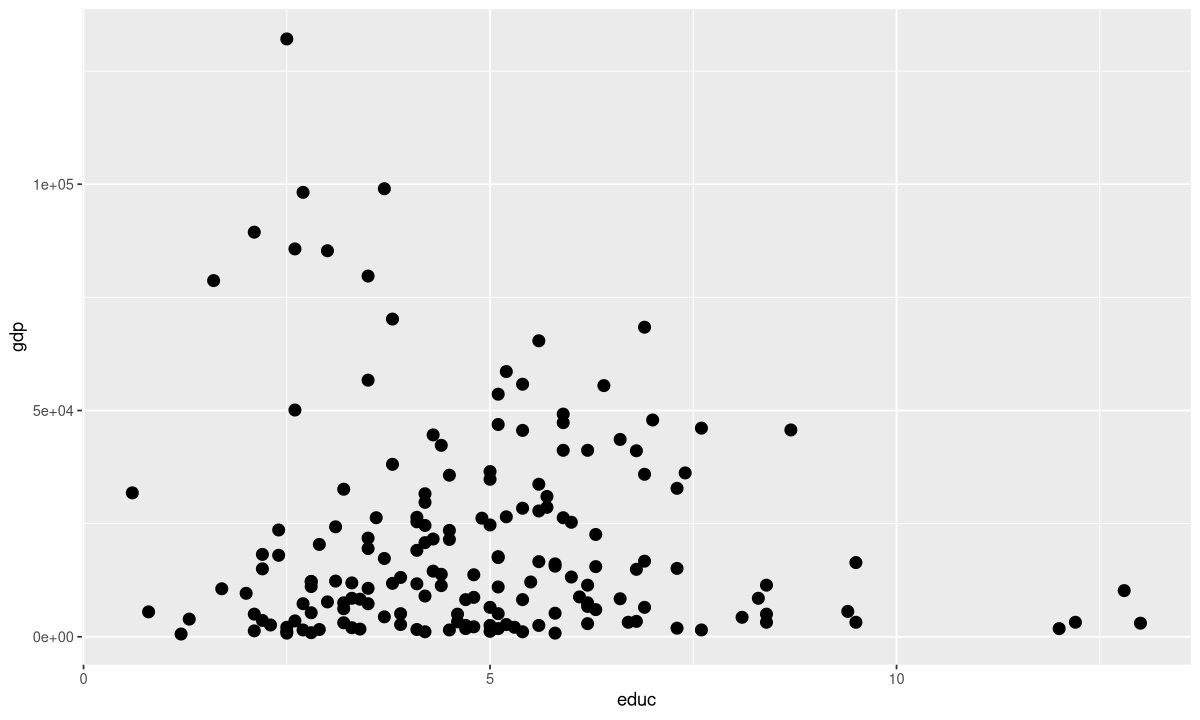

In [3]:
g <- ggplot(data = CIACountries, aes(y = gdp, x = educ))
g + geom_point(size = 3)

2. Gráfico de dispersão em que o atributo `net_users` é mapeada para cor

Warning message:
“Removed 64 rows containing missing values (geom_point).”


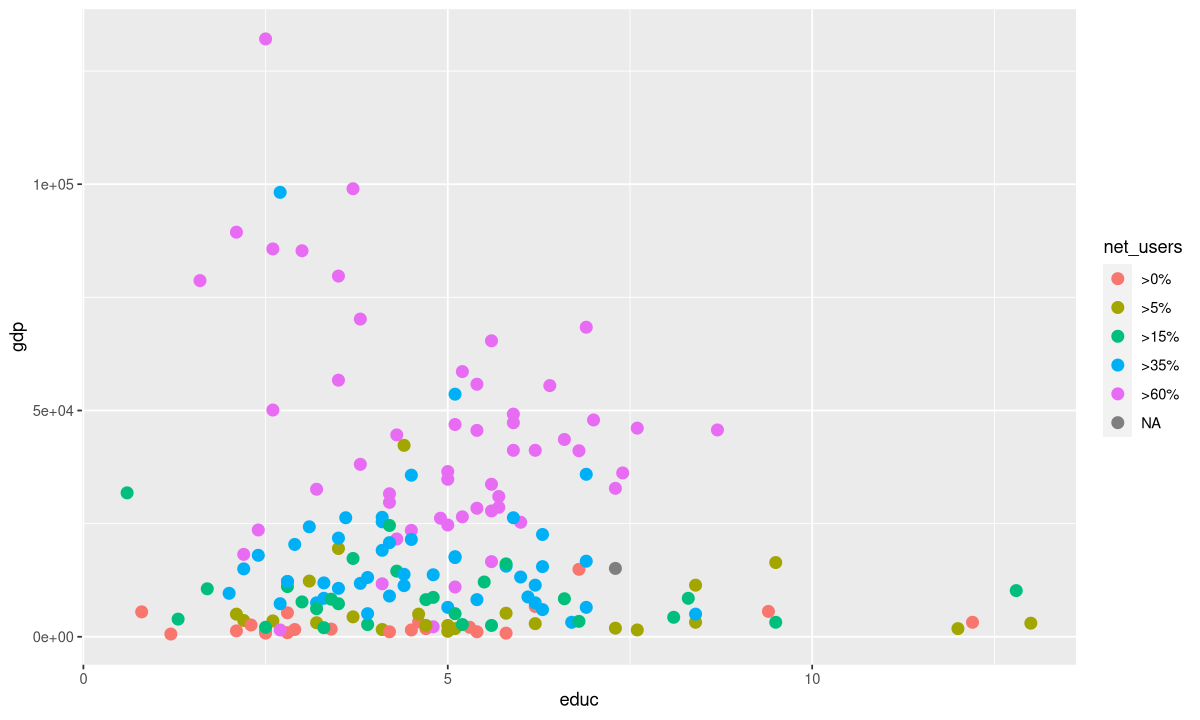

In [4]:
g + geom_point(aes(color = net_users), size = 3)

3. Gráfico de dispersão em que tanto a localização quanto o nome do país são usados como estéticas

Warning message:
“Removed 64 rows containing missing values (geom_text).”


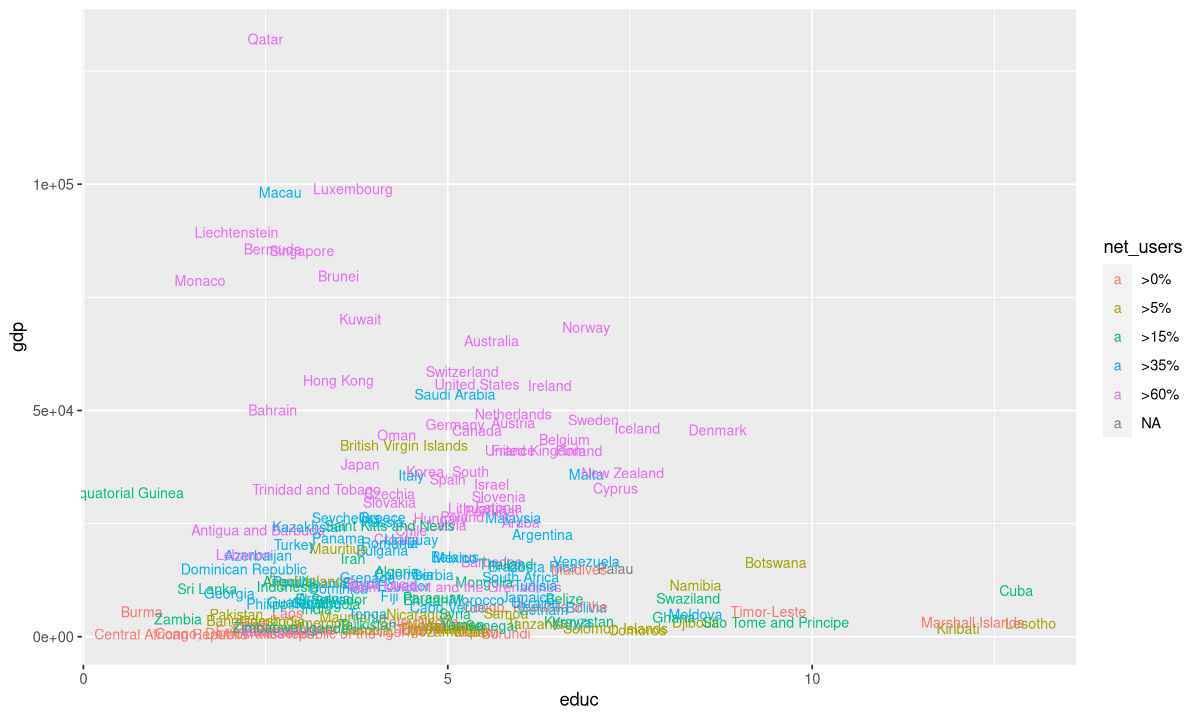

In [5]:
g + geom_text(aes(label = country, color = net_users), size = 3)

Warning message:
“Removed 66 rows containing missing values (geom_point).”


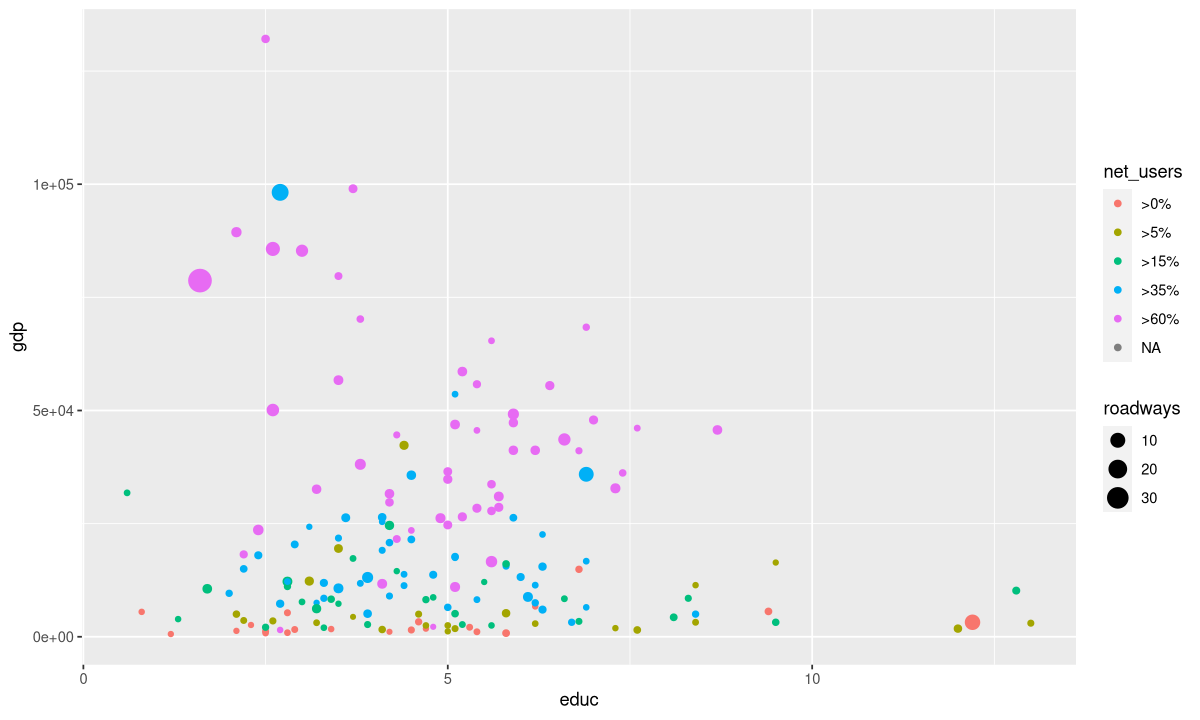

In [6]:
g + geom_point(aes(color = net_users, size = roadways))

## Escala (_Scale_)

Warning message:
“Removed 66 rows containing missing values (geom_point).”


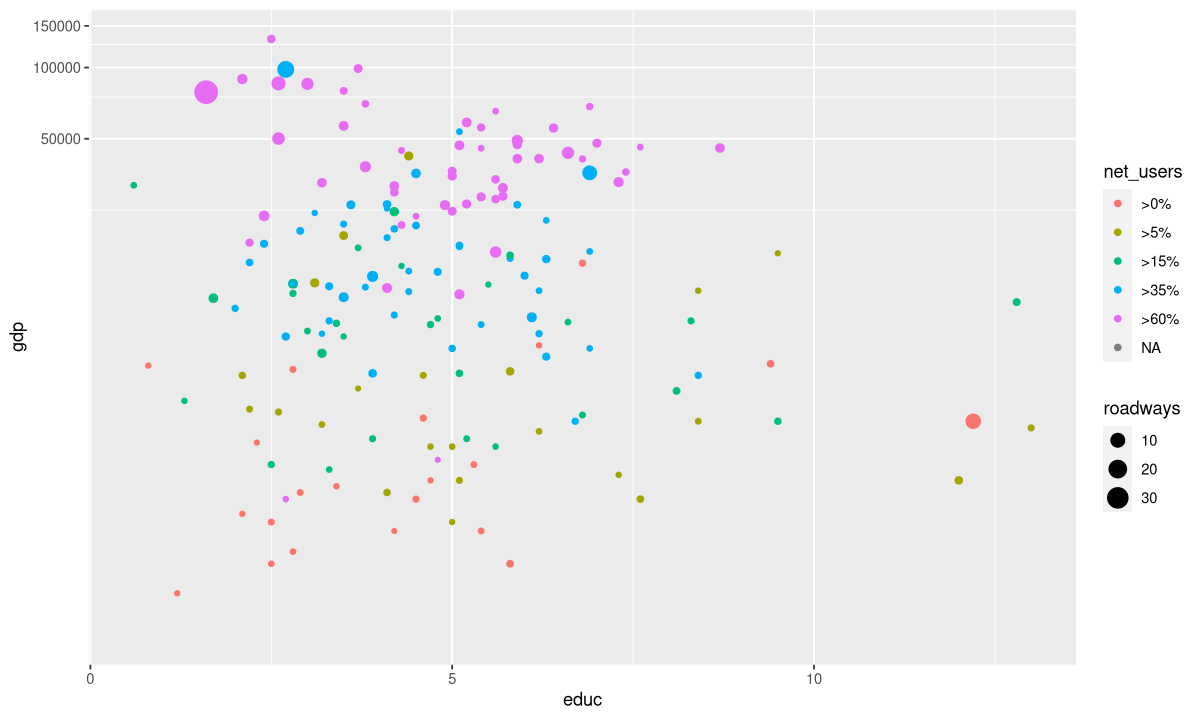

In [7]:
g + geom_point(aes(color=net_users, size = roadways)) + 
    coord_trans(y = "log10")

Warning message:
“Removed 66 rows containing missing values (geom_point).”


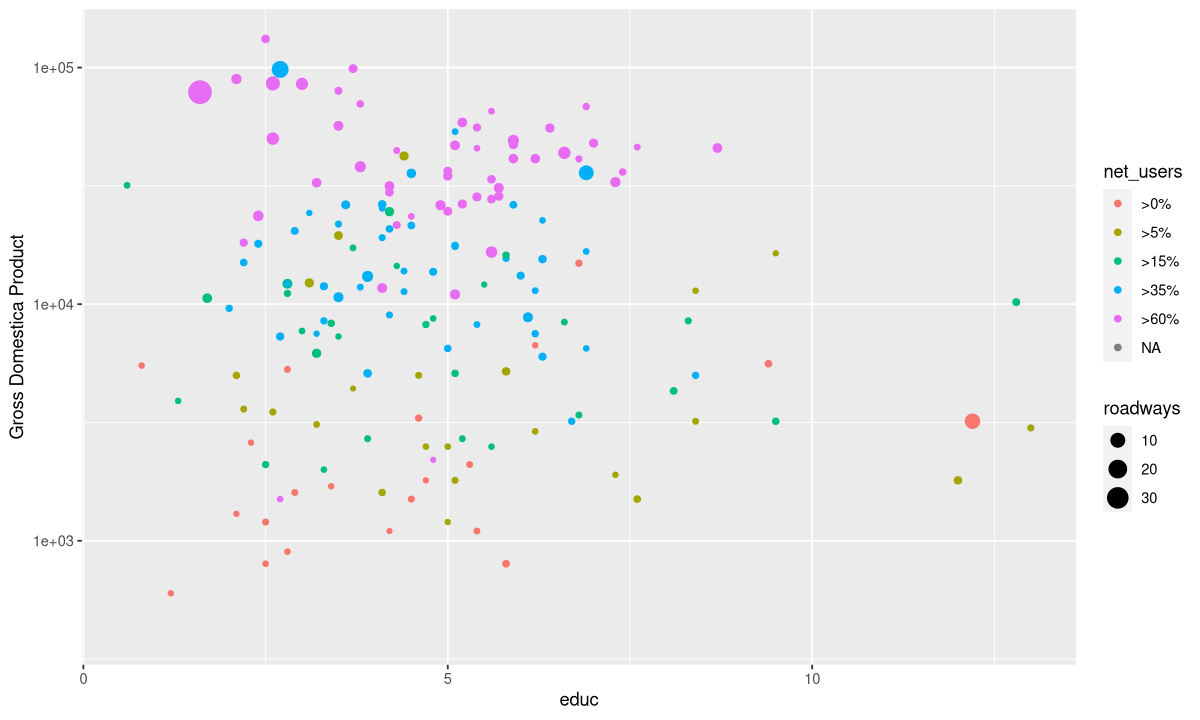

In [8]:
g + geom_point(aes(color = net_users, size = roadways)) + 
    scale_y_continuous(name = "Gross Domestica Product", trans = "log10")

## Facetas (_Facets_)

Warning message:
“Removed 66 rows containing missing values (geom_point).”


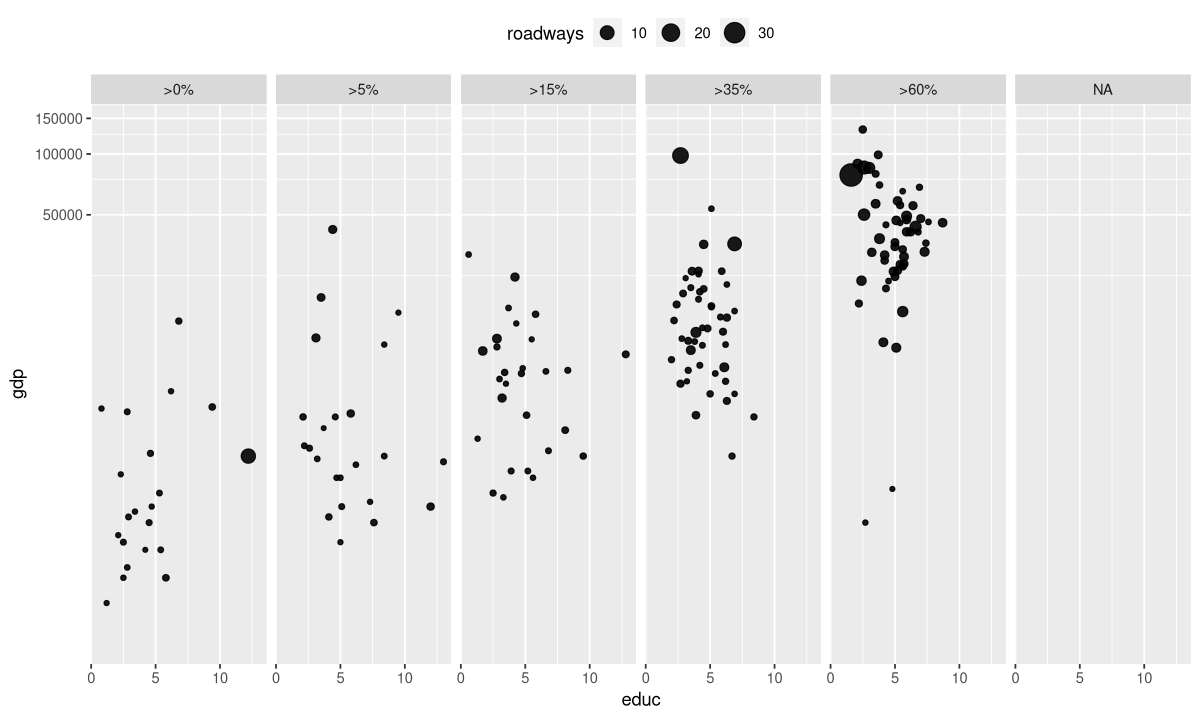

In [9]:
g + geom_point(alpha = 0.9, aes(size = roadways)) + 
    coord_trans(y = "log10") + 
    facet_wrap(~net_users, nrow = 1) + 
    theme(legend.position = "top")

## Camadas (_Layers_)

In [10]:
data(MedicareCharges)
str(MedicareCharges)

tibble [5,025 × 4] (S3: tbl_df/tbl/data.frame)
 $ drg          : chr [1:5025] "039" "039" "039" "039" ...
 $ stateProvider: Factor w/ 51 levels "AK","AL","AR",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ num_charges  : int [1:5025] 1 23 16 24 67 10 15 3 3 81 ...
 $ mean_charge  : num [1:5025] 34805 32044 27463 33443 56095 ...


In [11]:
head(MedicareCharges)

drg,stateProvider,num_charges,mean_charge
<chr>,<fct>,<int>,<dbl>
039,AK,1,34805.13
039,AL,23,32044.44
039,AR,16,27463.27
039,AZ,24,33443.36
039,CA,67,56094.93
039,CO,10,35252.21


In [12]:
ChargesNJ <- MedicareCharges %>% filter(stateProvider == "NJ")
head(ChargesNJ)

drg,stateProvider,num_charges,mean_charge
<chr>,<fct>,<int>,<dbl>
039,NJ,31,35103.81
057,NJ,55,45692.07
064,NJ,55,87041.64
065,NJ,59,59575.74
066,NJ,56,45819.13
069,NJ,61,41916.70


In [13]:
p <- ggplot(data = ChargesNJ,
            aes(x = reorder(drg, mean_charge), y = mean_charge)) +
        geom_bar(fill = "gray", stat = "identity") + 
        ylab("Statewide Average Charges ($)") +
        xlab("Medical Procedure (DRG)") +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

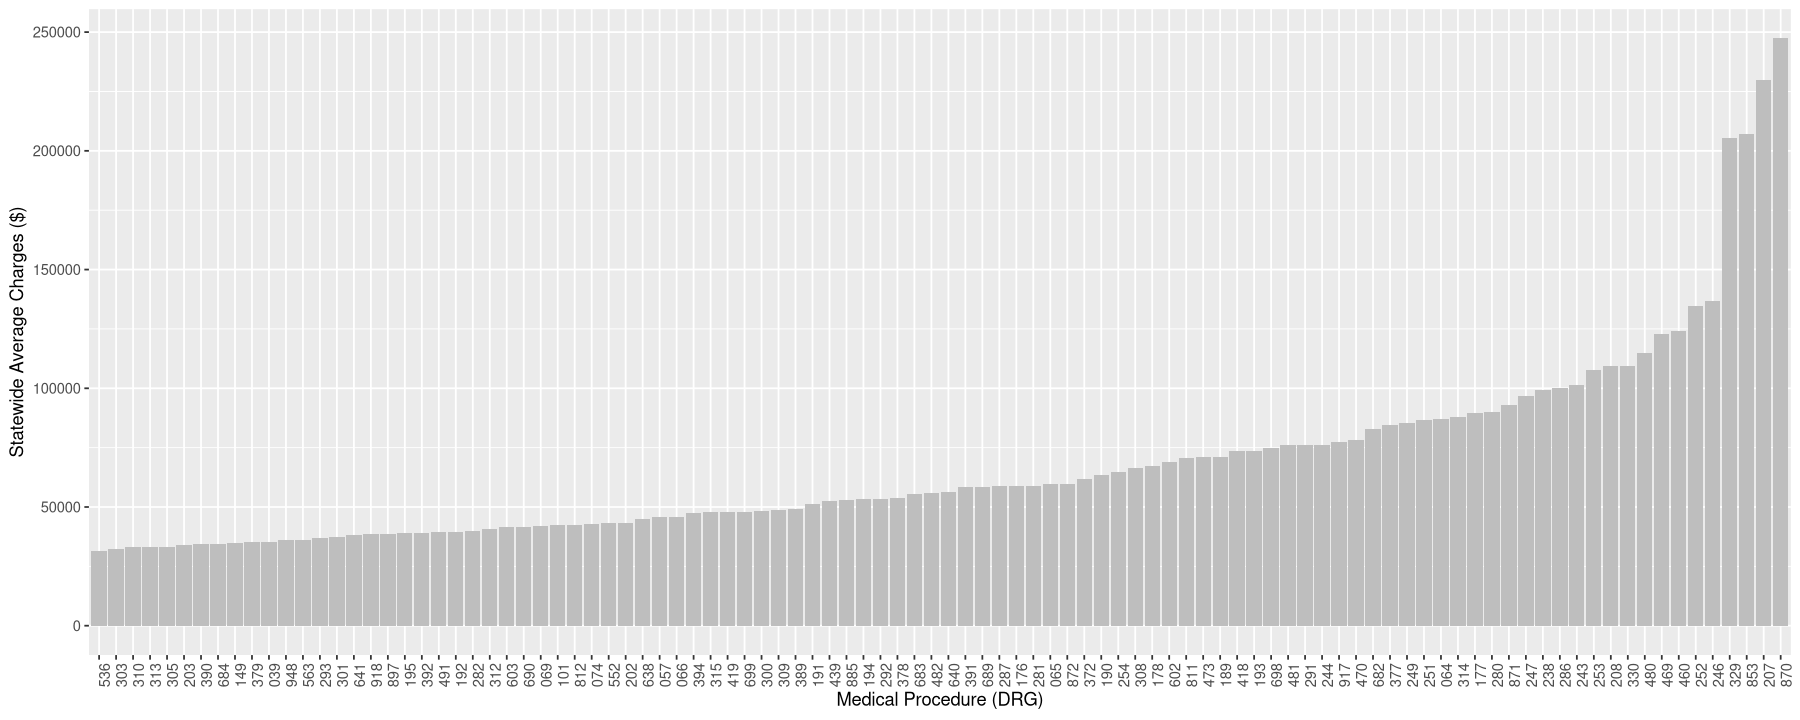

In [14]:
options(repr.plot.width = 15, repr.plot.height = 6)
p

## Gráficos canônicos em R

In [15]:
data(SAT_2010)

In [16]:
g <- ggplot(data = SAT_2010, aes(x = math))

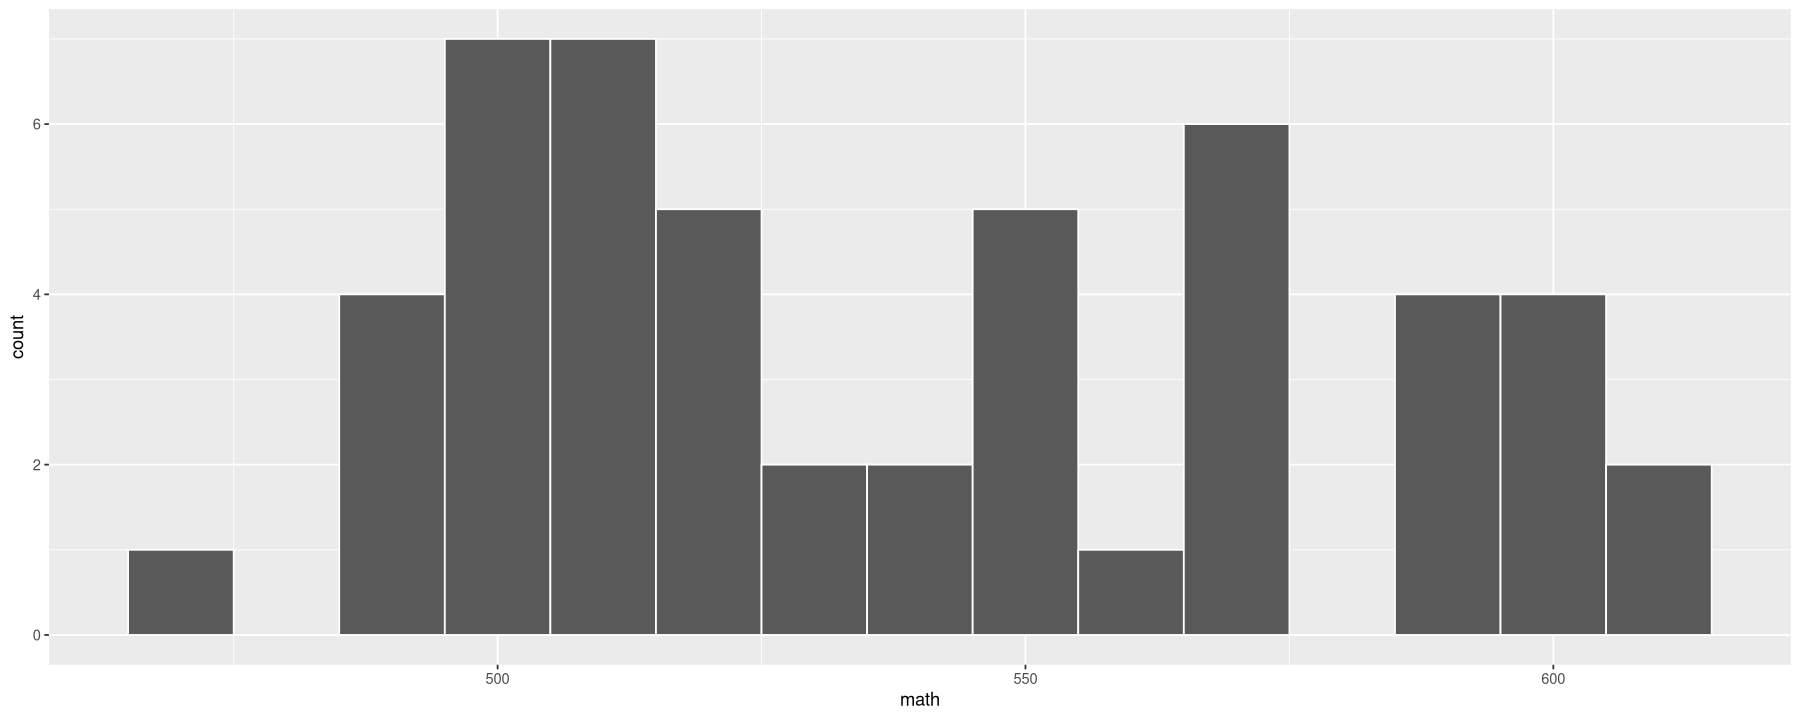

In [17]:
g + geom_histogram(binwidth = 10, color="white")

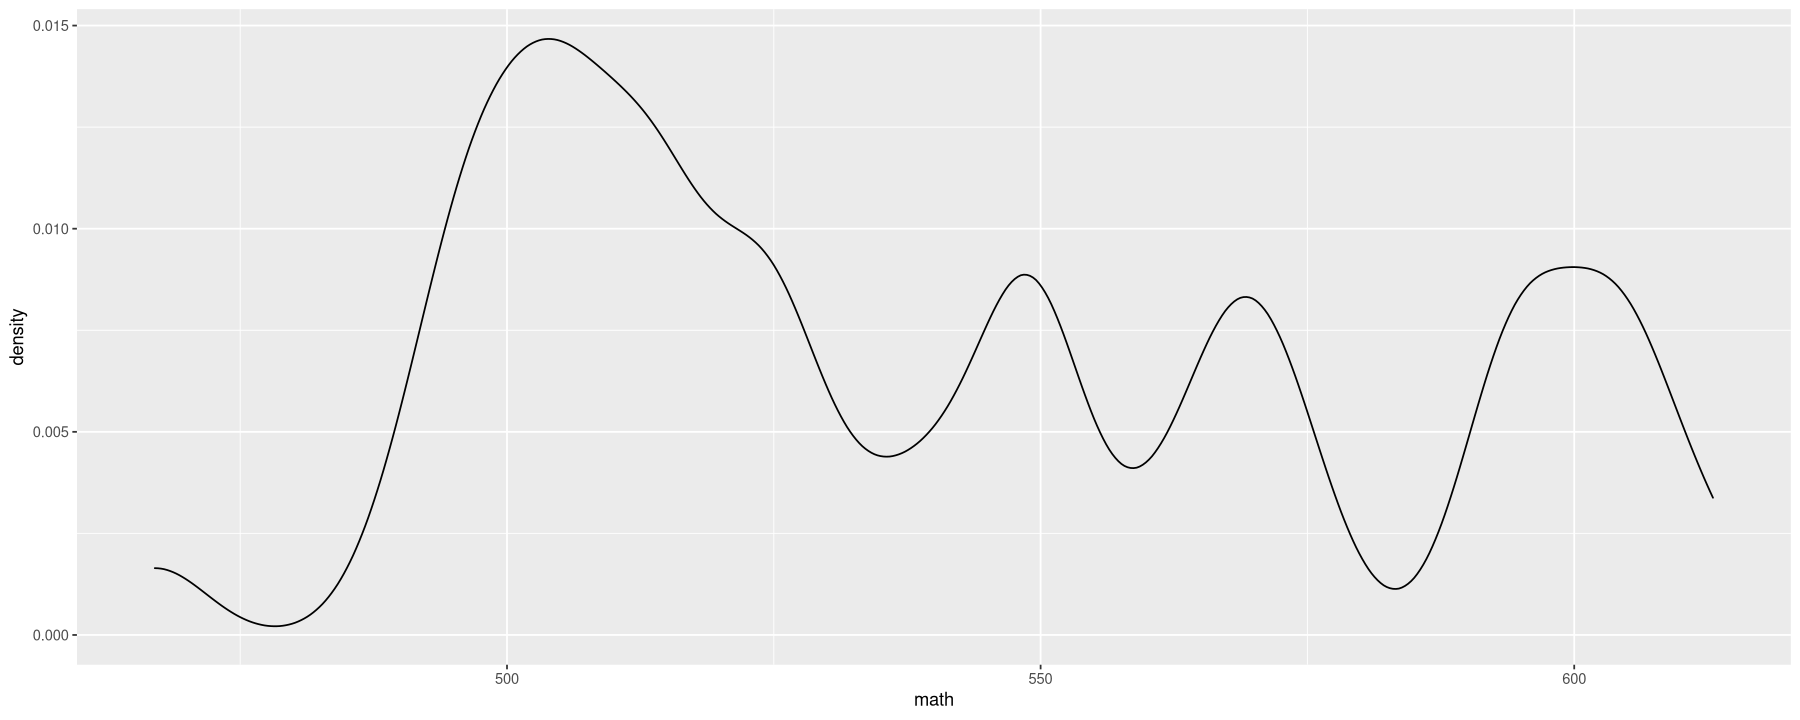

In [18]:
g + geom_density(adjust = 0.3)

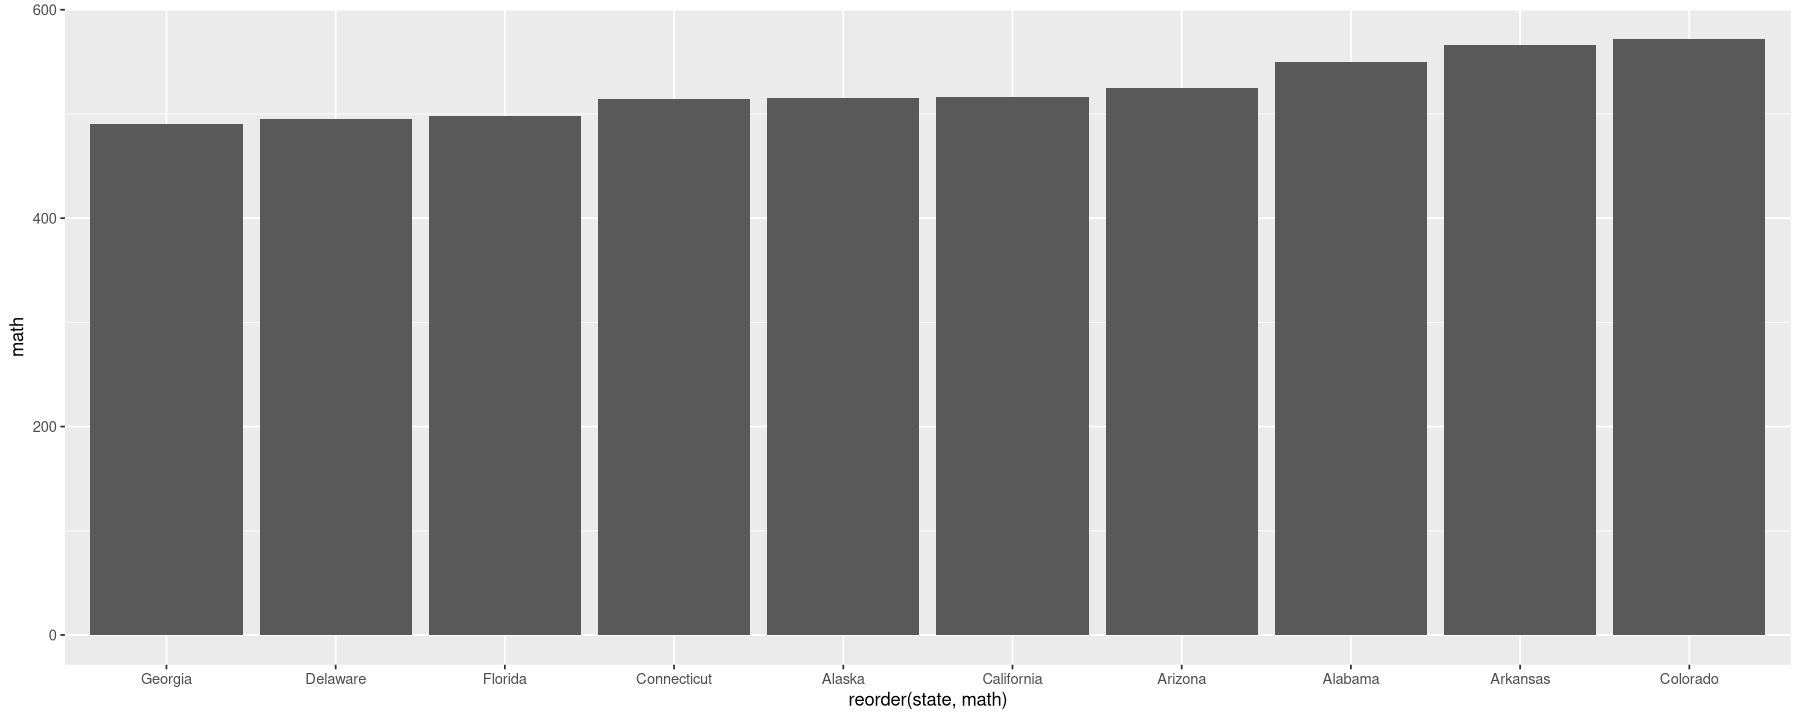

In [19]:
ggplot(data = head(SAT_2010, 10), aes(x = reorder(state, math), y = math)) + geom_bar(stat = "identity")

## Multivariate displays

In [27]:
SAT_2010 <- SAT_2010 %>%
    mutate(SAT_rate = cut(sat_pct, breaks = c(0, 30, 60, 100), labels = c('low', 'medium', 'high')))
head(SAT_2010)

,state,expenditure,pupil_teacher_ratio,salary,read,math,write,total,sat_pct,SAT_rate
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,Alabama,10,15.3,49948,556,550,544,1650,8,low
2,Alaska,17,16.2,62654,518,515,491,1524,52,medium
3,Arizona,9,21.4,49298,519,525,500,1544,28,low
4,Arkansas,10,14.1,49033,566,566,552,1684,5,low
5,California,10,24.1,71611,501,516,500,1517,53,medium
6,Colorado,10,17.4,51660,568,572,555,1695,19,low


In [29]:
g <- ggplot(data = SAT_2010, aes(x = expenditure, y = math)) + geom_point()

In [30]:
g <- g + geom_smooth(method = "lm", se = 0) +
    xlab("Average expediture per student ($1000)") +
    ylab("Average score on math SAT")

`geom_smooth()` using formula 'y ~ x'



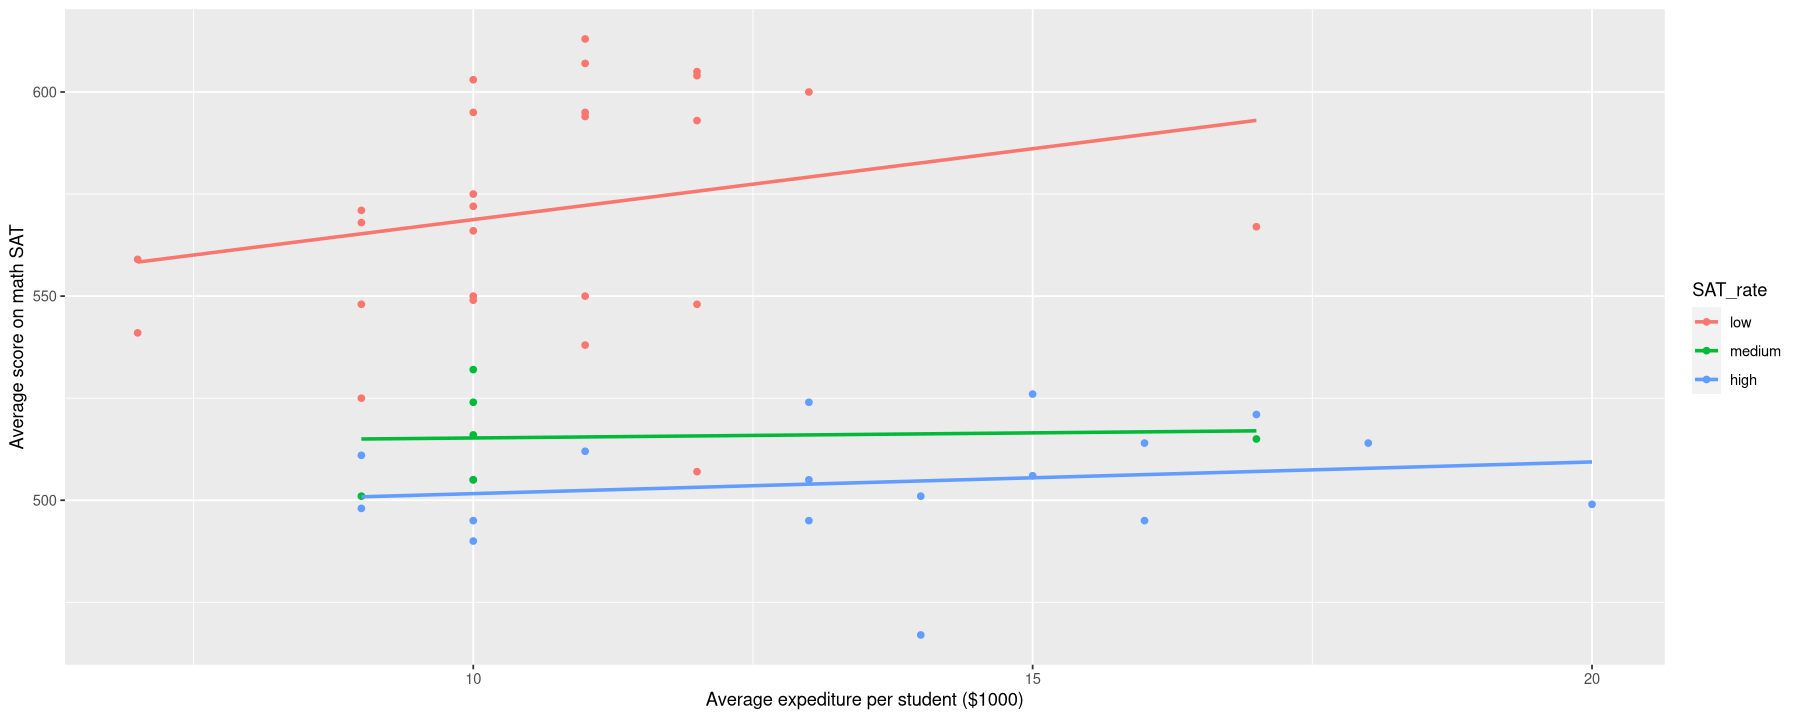

In [31]:
g + aes(color = SAT_rate)

In [23]:
head(SAT_2010)

,state,expenditure,pupil_teacher_ratio,salary,read,math,write,total,sat_pct
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,Alabama,10,15.3,49948,556,550,544,1650,8
2,Alaska,17,16.2,62654,518,515,491,1524,52
3,Arizona,9,21.4,49298,519,525,500,1544,28
4,Arkansas,10,14.1,49033,566,566,552,1684,5
5,California,10,24.1,71611,501,516,500,1517,53
6,Colorado,10,17.4,51660,568,572,555,1695,19


### Exemplo: Nomes históricos de bebês

In [32]:
library(babynames)

In [33]:
BabynamesDist = make_babynames_dist()
head(BabynamesDist, 2)

year,sex,name,n,prop,alive_prob,count_thousands,age_today,est_alive_today
<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1900,F,Mary,16706,0.05257559,0,16.706,114,0
1900,F,Helen,6343,0.01996211,0,6.343,114,0


In [35]:
BabynamesDist %>% filter(name == "Benjamin") %>% head()

year,sex,name,n,prop,alive_prob,count_thousands,age_today,est_alive_today
<dbl>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1900,M,Benjamin,450,0.00277550,0.000000,0.450,114,0.000000
1901,M,Benjamin,343,0.00296726,0.000025,0.343,113,0.008575
1902,M,Benjamin,374,0.00281733,0.000050,0.374,112,0.018700
1903,M,Benjamin,324,0.00250530,0.000075,0.324,111,0.024300
1904,M,Benjamin,358,0.00258469,0.000100,0.358,110,0.035800
1905,M,Benjamin,379,0.00264595,0.000125,0.379,109,0.047375


#### Porcentagem de pessoas vivas hoje

In [36]:
joseph <- BabynamesDist %>%
    filter(name == "Joseph" & sex == "M")

In [37]:
name_plot <- ggplot(data = joseph, aes(x = year))

In [39]:
name_plot <- name_plot +
    geom_bar(stat = "identity", aes(y = count_thousands * alive_prob), fill = "#b2d7e9", colour = "white")

In [40]:
name_plot <- name_plot + geom_line(aes(y = count_thousands), size = 2)

In [41]:
name_plot <- name_plot + ylab("Number of People (Thousands)") + xlab(NULL)

In [43]:
summary(name_plot)

data: year, sex, name, n, prop, alive_prob, count_thousands, age_today,
  est_alive_today [111x9]
mapping:  x = ~year
faceting: <ggproto object: Class FacetNull, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet, gg>
-----------------------------------
mapping: y = ~count_thousands * alive_prob 
geom_bar: width = NULL, na.rm = FALSE, orientation = NA
stat_identity: na.rm = FALSE
position_stack 

mapping: y = ~count_thousands * alive_prob 
geom_bar: width = NULL, na.rm = FALSE, orientation = NA
stat_identity: na.rm = FALSE
position_stack 

mapping: y = ~count_thousands 
geom_line: na.rm = FALSE, orientation = NA
stat_identity: na.rm = FALSE
po

In [45]:
wtd.quantile <- Hmisc::wtd.quantile

ERROR: Error in loadNamespace(x): there is no package called ‘Hmisc’


In [ ]:
install.packages("Hmisc")

Installing package into ‘/home/igoandrade/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


